# 2학기 종합설계 발표 스케치

## Recall 1st Semester - Laplace Equation
Laplace Equation은 비압축성, 비회전류 유동에서 정상상태일 때 Velocity Potential 또는 Streamfunction의 해이다.

$$
\nabla^2 u = 0.
$$

간단한 예제로 Heat Conduction에 의해 Steady State에 도달하는 경우를 생각하자

예를 들면, 윗면에 온도만 300도이고 나머지 면의 온도가 100도인 경우 최종적으로 2차원 공간 내 온도 분포는 Laplace Equation으로 구할 수 있다.

$[0,1]^2$ 공간에 대해 수식으로 표현하면 다음과 같다.

$$
-k (T_{xx} + T_{yy}) = 0\\
T(x,1) = 300, T(x, 0) = T(0, y) = T(1, y) = 100
$$

편의상 $k=1$ 로 생각한다.

### Finite Difference Method
계산 영역을 x, y 각 방향별로 균일하게 나누어서 생각하면 2차원 Array는 각 격자점의 해와 부합한다.

각 방향별 편미분을 2차 정확도 Central Difference로 표현하면 다음과 같다.

$$
\frac {T_{i+1,j} -2 T_{i,j} +  T_{i-1,j}}{\Delta x^2}
+
+\frac {T_{i,j+1}^n -2 T_{i,j}^n +  T_{i,j-1}^n}{\Delta y^2}
=0
$$

$\Delta x = \Delta y = h$ 인 경우 다음과 같이 정리된다.

$$
T_{i+1,j} + T_{i,j+1} - 4 T_{i,j} + T_{i,j-1} + T_{i-1,j}
=0
$$

이를 Matrix 형태로 나타내면 다음과 같다.

$$
\left [
\begin{matrix}
-4 & 1 &   & 1 &   &   &   &   &
\\ 
 1 &-4 & 1 &   & 1 &   &   &   &
\\
   & 1 &-4 &   &   & 1 &   &   &
\\
 1 &   &   &-4 & 1 &   & 1 &   & 
\\
   & 1 &   & 1 &-4 & 1 &   & 1 & 
\\
   &   & 1 &   & 1 &-4 &   &   & 1
\\
   &   &   & 1 &   &   &-4 & 1 & 
\\
   &   &   &   & 1 &   & 1 &-4 & 1
\\
   &   &   &   &   & 1 &   & 1 &-4
\end{matrix}
\right ]
\left [
\begin{matrix}
T_{1,1} \\
T_{1,2} \\
T_{1,3} \\
T_{2,1} \\
T_{2,2} \\
T_{2,3} \\
T_{3,1} \\
T_{3,2} \\
T_{3,3} 
\end{matrix}
\right ]
=
\left [
\begin{matrix}
-T_{1,0} & -T_{0,1} \\ & -T_{0,2} \\ - T_{1,4} &-T_{0,3}  \\
-T_{2,0} & \\ 0 \\ -T_{2,4} &  \\
-T_{3,0} &-T_{4,1} \\ &-T_{4,2} \\ - T_{3,4}& -T_{4,3}
\end{matrix}
\right ]
$$

단 한번에 역행렬을 구함으로 써 모든 점에서 온도를 구할 수 있다.

다만 공간 차분 점이 늘어날수록 역행렬을 계산하는 시간이 급격하게 늘어난다.

1학기에는 Jacobi Method를 이용하여 해를 수렴시키는 방법을 사용했고 이번에는 Ax=b를 해결하는 방법을 이용한다.

## Conjugate Gradient Method
해를 찾는 방향 벡터가 $r_k$ 가 아니고 $d_k$ 라 하자.

$$
x_{k+1} = x_{k} + \alpha d_k
$$

이 경우에도 $\delta \phi=0$ 을 만족시키는 학습률은 아래와 같다.

$$
\alpha_k = \frac{r_k^T d_k}{d_k^T A d_k}.
$$

Conjugate Gradient method는 방향 벡터 $d_k$ 가 $A$ Conjugate (또는 $A$-Orthognal)을 만족한다.

$$
d_i^T A d_j = 0~~~\textrm{for all}~i \neq j.
$$

이 방향벡터 $d_k$ 는 residual $r_k$ 의 선형 결합으로 구성한다.

$$
d_k = r_k + \beta_k d_{k-1}
$$

$A$ Conjugate 를 만족하기 위해서는 위 식에서 양변에 $d_{k-1}^T A$를 곱한다.

$$
d_{k-1}^T A d_k = d_{k-1}^T A (r_k + \beta_k d_{k-1}).
$$

$d_{k-1}^T A d_k=0$ 이므로 $\beta_k$ 는 다음과 같다.

$$
\beta_k = -\frac{d_{k-1}^T A r_k}{d_{k-1}^T A d_{k-1}}
$$

다음 성질을 만족한다.

### Theorem 1 (Orthogonality of residual)
$$
r_{k+1}^T r_i = 0~~\textrm{for all}~i \le k 
$$

#### Proof
$x_k$ 는 $x_0$ 와 $d_1, d_2,...,d_k$ 의 선형 결합으로 표현할 수 있다. 

$$
x_{k+1} = x_0 + D_k y
$$

$D_k$ 를 이들 방향 벡터로 구성한 Matrix이다. 이를 에너지 식에 적용하면

$$
\phi(x_0 + D_k y) = \phi(x_0) + \frac{1}{2} y^T (D_k^T A D_k) y - y^T D_k^T(b - Ax_0)
$$

에너지가 최소화 되어야 하므로

$$
(D_k^T A D_k) y = D_k^T (b - Ax_0).
$$

즉

$$
D_k^T (b- Ax_0) - (D_k^T A D_k) y = D^k (b - A(x_0 + D_ky)) = D_k ^T r_{k+1} = 0
$$

그러므로 

$$
r_{k+1}^T d_i = 0~~\textrm{for all}~i \le k
$$

이를 이용하면 $i \le k$ 인 경우

$$
r_{k+1}^T r_i = r_{k+1}^T (d_i - \beta_i d_{i-1})=0
$$

즉 Residual은 서로 수직임을 알 수 있다.


### 구현
Residual의 직교성을 이용하면
$$
d_k - r_k = \beta_k d_{k-1} \\
$$

이므로

$$
r_k^T(d_k - r_k) = \beta_k r_k^T d_{k-1}=0
$$

그러므로

$$
r_k^T d_k = r_k^T r_k
$$

즉

$$
\alpha_k = \frac{r_k^T d_k}{d_k^T A d_k} = \frac{r_k^T r_k}{d_k^T A d_k}
$$

$r_k=b - Ax_k$ 이므로

$$
r_{k+1} - r_k = -A (x_{k+1} - x_k) = -\alpha_k A d_k.
$$

이를 이용하면

$$
\beta_{k+1} = -\frac{d_{k}^T A r_{k+1}}{d_{k}^T A d_{k}} =  -\frac{r_{k+1}^T(r_{k+1} - r_k)}{d_k^T(r_{k+1} - r_k)}
$$

여기서 $d_k^T r_{k+1}=0$, $r_k^T d_k= r_k^T r_k$ 이고

$$
r_{k+1}^T r_k= r_{k+1}^T (d_k + \beta_k d_{k-1}) = r_{k+1}^T d_k + \beta_k r_{k+1}^Td_{k-1} = 0
$$

을 적용하면

$$
\beta_{k+1} =  \frac{r_{k+1}^Tr_{k+1}}{r_k^T r_k}.
$$


In [1]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

In [1]:
from Laplace_cg import *

### Laplace Equation의 CG기법 적용
그리드 사이즈는 200*200으로 적용 + dtype은 float32

반복 기법에서 중요한 것은 반복의 횟수 = 그리드 사이즈

근데 이거는 Ax=b를 푸는 거니까 A의 특징들이 중요하다는 것이 가장 큰 차이점이다.

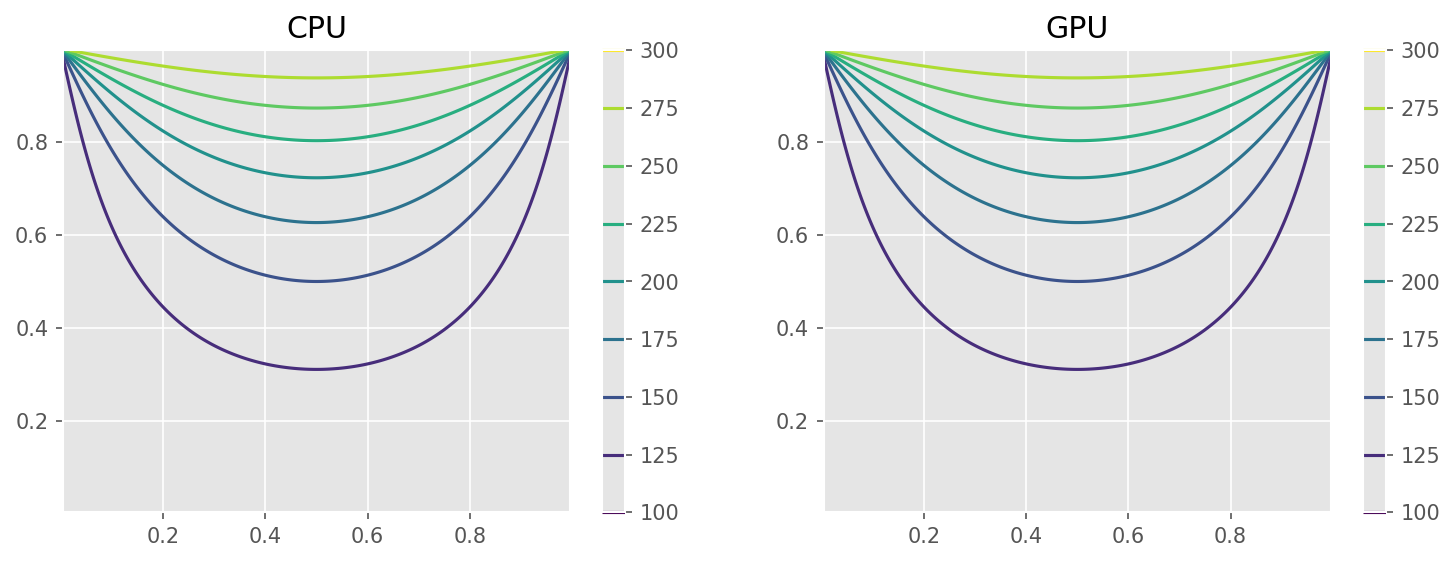

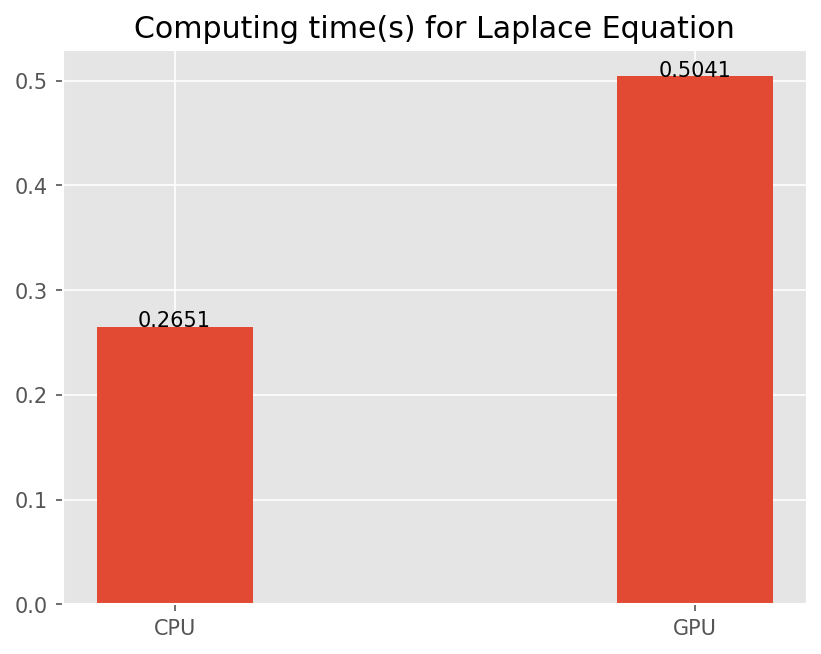

In [2]:
t_laplace = main_laplace()

## Condition Number

행렬 A의 민감도를 나타내는 값

선형 시스템 $A\mathbf{x} = \mathbf{b}$를 풀 때 입력 데이터($\mathbf{b}$ 또는 $A$)에 작은 오차가 발생했을 때 해($\mathbf{x}$)가 얼마나 크게 변동하는지를 측정하는 척도.

조건수가 클수록 시스템은 불안정하고 해를 구하기 어렵다.

### 조건수의 정의 및 계산

조건수 $\text{cond}(A)$는 보통 Matrix Norm을 사용하여 정의한다

$$\text{cond}(A) = \|A\| \cdot \|A^{-1}\|$$

* $\|A\|$는 행렬 $A$의 norm이다.
* $\|A^{-1}\|$는 행렬 $A$의 역행렬 $A^{-1}$의 norm이다.

### Conjugate Gradientdhk의 관계

CG의 수렴 속도는 조건수 $\kappa = \text{cond}(A)$에 의해 결정되며 다음 부등식으로 나타낸다.

$$\frac{\| \mathbf{x}_k - \mathbf{x} \|_A}{\| \mathbf{x}_0 - \mathbf{x} \|_A} \leq 2 \left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1} \right)^k$$

* 조건수가 클수록 오차가 천천히 감소 = 수렴 속도 감소 (행렬이 ill-conditioned 상태가 나쁨)
* 조건수가 작을수록 오차가 빠르게 감소 = 수렴 속도 빠름 (행렬이 well-conditioned 상태가 좋음)
* 조건수가 무한이면 A는 Singular Matrix로 해가 없거나 무수히 많은 상태(CG 적용 불가)

### CG 성능 개선을 위한 방법: Preconditioning

새로운 시스템 $M^{-1} A \mathbf{x} = M^{-1} \mathbf{b}$을 풀어 변환된 행렬 $M^{-1}A$의 조건수를 1에 가깝게 만들어 수렴 속도를 높이는 방법


## 대각도 (Diagonal Dominance)

대각도는 정사각 행렬 $A$의 각 행에서 대각 성분이 다른 비대각 성분들에 비해 얼마나 큰지를 나타내는 성질이다.

행렬 $A = (a_{ij})$가 강한 대각 우위(Strictly Diagonally Dominant)를 갖는다는 것은 모든 행 $i$에 대해 다음 부등식을 만족하는 것을 의미한다

$$|a_{ii}| > \sum_{j \neq i} |a_{ij}|$$

* **$|a_{ii}|$**: $i$행의 대각 성분(Diagonal Element)의 절댓값.
* **$\sum_{j \neq i} |a_{ij}|$**: $i$행의 모든 비대각 성분(Off-Diagonal Elements) 절댓값의 합.

### CG 성능에 미치는 영향

대각 성분이 지배적일수록 (대각도가 강할수록) CG법의 성능은 향상됨.

* **높은 대각도 (강한 대각 우위)**:
    * ***행렬이 Positive Definite일 가능성이 높아짐***.
    * 행렬의 Condition Number가 작아지는 경향.
    * 결과적으로 CG와 같은 반복 해법의 수렴 속도가 빨라지고 해가 더 안정적이다.
* **낮은 대각도**:
    * 조건수가 커지고, 수렴 속도가 느려지며, 불안정해집니다.

## 대역폭 (Bandwidth)

대역폭은 희소 행렬에서 0이 아닌 성분들이 주대각선을 중심으로 얼마나 가깝게 분포되어 있는지를 나타내는 척도이다.

행렬 $A$의 대역폭(Bandwidth, $W$)은 행렬의 모든 0이 아닌 성분 $a_{ij} \neq 0$에 대해 다음 값의 최댓값으로 정의한다

$$W = \max \{ |i - j| \mid a_{ij} \neq 0 \}$$

* 행렬의 대역폭이 작을수록 행렬은 Band Matrix의 형태에 가까워집니다.
* $|i-j|$는 주대각선($i=j$)으로부터의 거리를 나타냅니다.

### CG 성능에 미치는 영향

대역폭은 행렬-벡터 곱셈($A\mathbf{x}$)의 효율성과 메모리 접근 패턴에 영향을 준다.

* **좁은 대역폭 (Small Bandwidth)**:
    * 0이 아닌 성분(Non-zeros, $\text{nnz}$)들이 대각선 근처에 집중되어 있어 구조적 이점을 활용하기 쉽다.
    * 직접 해법의 경우 메모리 사용량과 계산 복잡도를 크게 줄여준다 (대각선 근처만 계산).
    * GPU 기반 계산에서는 메모리 접근 패턴이 규칙적이어서 데이터 지역성(Locality)을 높이고 병렬 처리 효율을 향상시킬 수 있다.
* **넓은 대역폭 (Large Bandwidth)**:
    * 0이 아닌 성분들이 행렬 전체에 넓게 퍼져 있어 계산의 복잡성이 증가하고 메모리 접근이 불규칙해져 효율이 떨어질 수 있다.

#### 참고 : 대역폭 감소 기법

대역폭이 넓은 희소 행렬을 처리할 때, 행과 열의 순서를 변경하여 대역폭을 줄이는 **재배열(Reordering)** 기법(예: Cuthill-McKee 알고리즘)을 사용하기도 합니다. 이를 통해 행렬의 저장 효율과 계산 성능을 개선할 수 있습니다. 

### 행렬의 크기, 조건수, 대각도, 대역폭 4개의 변수

In [2]:
from make_sys import *

4.3513026
4.0141816
4.639409
4.275313
4.238344


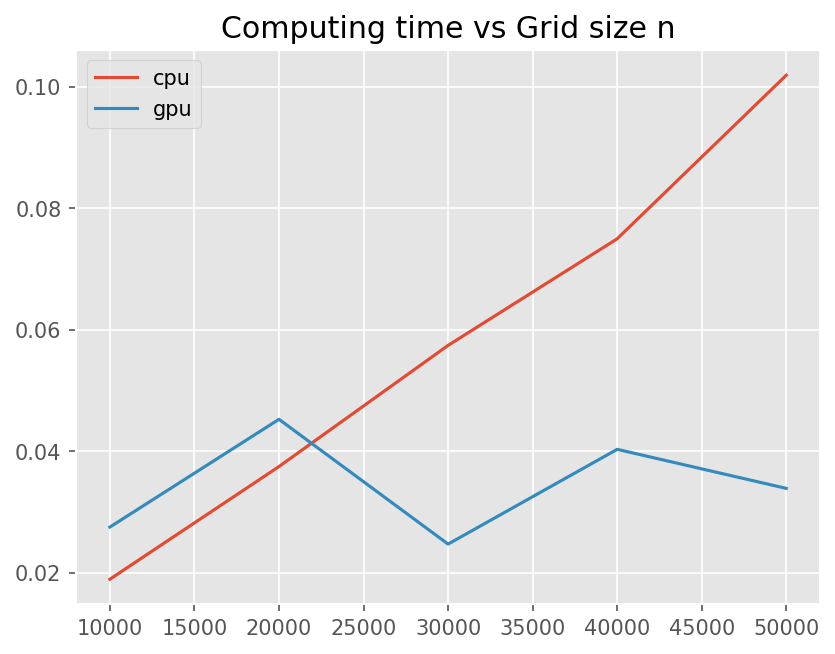

In [5]:
ns = [10000, 20000, 30000, 40000, 50000]
W = 100

ts_cpu=[]
ts_gpu=[]

for n in ns:
    a = make_A(n, W)
    print(cond(a))
    t_cpu, t_gpu = cal_time(a)
    ts_cpu.append(t_cpu)
    ts_gpu.append(t_gpu)

plt.plot(ns, ts_cpu, label='cpu')
plt.plot(ns, ts_gpu, label='gpu')
plt.title('Computing time vs Grid size n')
plt.legend()
plt.show()

4.1787057
4.25316
4.1057343
4.0748105
4.056958


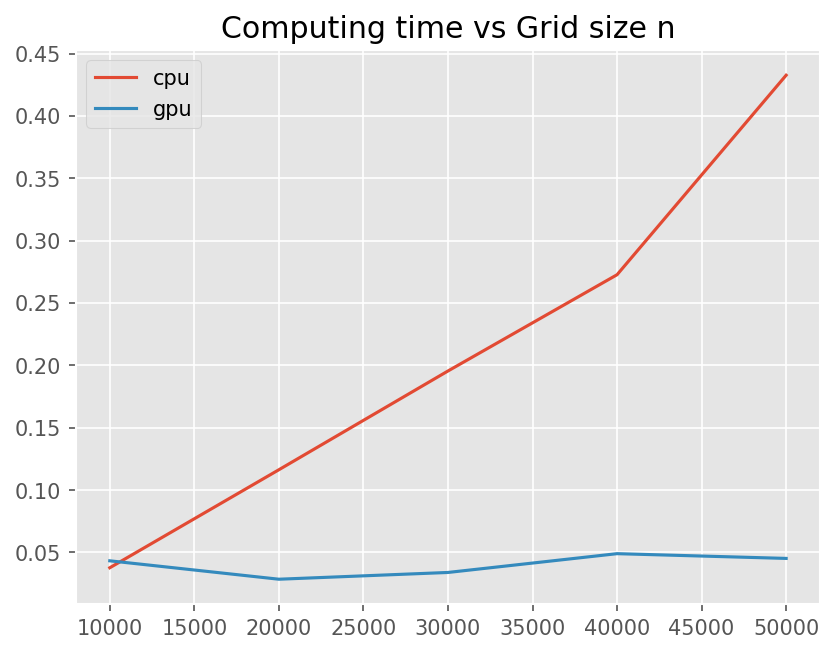

In [ ]:
n = 20000
ws = [100, 300, 500, 700, 1000]

ts_cpu=[]
ts_gpu=[]

for W in ws:
    a = make_A(n, W)
    print(cond(a))
    t_cpu, t_gpu = cal_time(a)
    ts_cpu.append(t_cpu)
    ts_gpu.append(t_gpu)

plt.plot(ws, ts_cpu, label='cpu')
plt.plot(ws, ts_gpu, label='gpu')
plt.title('Computing time vs Bandwidth W')
plt.legend()
plt.show()

8.736099
4.9897876
4.529426
3.2556858


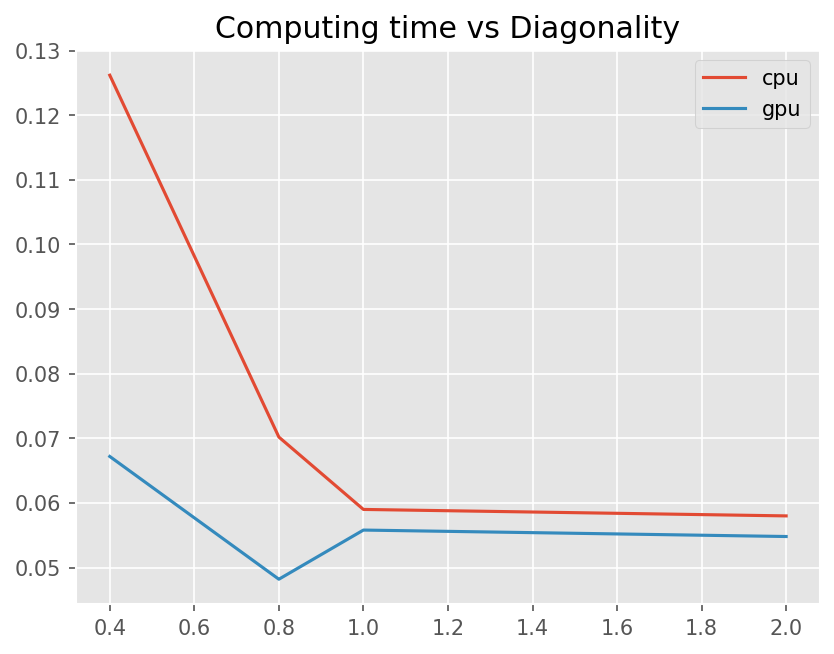

In [5]:
n = 20000
W = 100
ds = [0.4, 0.8, 1, 2]

ts_cpu=[]
ts_gpu=[]

for d in ds:
    a = make_A(n, W, diag=d)
    print(cond(a))
    t_cpu, t_gpu = cal_time(a)
    ts_cpu.append(t_cpu)
    ts_gpu.append(t_gpu)

plt.plot(ds, ts_cpu, label='cpu')
plt.plot(ds, ts_gpu, label='gpu')
plt.title('Computing time vs Diagonality')
plt.legend()
plt.show()